<a href="https://colab.research.google.com/github/mratanusarkar/Web-Scraping-tickertapeIN/blob/feature%2Ffilter-and-sort/Notebooks/scraping_tickertapeIN_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping stock data from tickertape.in

**Input**: stock name in "https://www.tickertape.in/stocks/{stock-name}" <br>
**Output**: full stock data & predictions from tickertape in JSON/Py Dictionary format


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import json
import time
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px

## Request and Fetch the Webpage

Let's try with a sample stock name, say "TCS"

In [2]:
# enter company subdirectory
subdir = "tata-consultancy-services-TCS"
# subdir = "adani-green-energy-ADNA"

In [3]:
# hit "https://www.tickertape.in/stocks/tata-consultancy-services-TCS"
requests.get("https://www.tickertape.in/stocks/" + subdir)

<Response [200]>

In [4]:
# wow! no restriction for bots! no need of any headers!
response = requests.get("https://www.tickertape.in/stocks/" + subdir)
response.text[0:500]

'<!DOCTYPE html><html lang="en-US"><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/favicon/favicon.png"/><link rel="apple-touch-icon" href="/favicon/favicon-192x192.png"/><link rel="manifest" href="/manifest/manifest.json"/><style type="text/css">:root {--white: #ffffff; --font_primary: #535B62; --font_dark: #2f363f; --font_light: #81878c; --font_blue: #0088ea; --font_lighter: #a2a8ae; --brand_primary: #151e28; --brand_success: #28c39a; --brand_danger:'

In [5]:
# not required for this webpage, use if bot restrictions are added in future.

# google chrome browser's request header (to make it look like, we are making this request from a browser)
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"
}

# hit using the header
response = requests.get("https://www.tickertape.in/stocks/" + subdir, headers=header)
response.text[0:500]

'<!DOCTYPE html><html lang="en-US"><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/favicon/favicon.png"/><link rel="apple-touch-icon" href="/favicon/favicon-192x192.png"/><link rel="manifest" href="/manifest/manifest.json"/><style type="text/css">:root {--white: #ffffff; --font_primary: #535B62; --font_dark: #2f363f; --font_light: #81878c; --font_blue: #0088ea; --font_lighter: #a2a8ae; --brand_primary: #151e28; --brand_success: #28c39a; --brand_danger:'

## Pass the fetched webpage response to Beautiful Soup

In [6]:
# give the webpage to Beautiful Soup using parsers: "html.parser" or "lxml"
soup = BeautifulSoup(response.text, 'lxml')

## Let us try and extract some data from the soup

- we see the whole webpage and how the html dom structure is made
- on inspecting, we see that all our required info is mostly inside div blocks with unique class names
- few are inside span or h tags, but all blocks has classes
- Let us extract few important html dom blocks and see

### [1] Basic Company Information

In [7]:
# company name
htmlBlock = soup.find("h3", class_="security-name")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<h3 class="jsx-2903438179 security-name">
 Tata Consultancy Services Ltd
</h3>
Tata Consultancy Services Ltd


In [8]:
# ticker name
htmlBlock = soup.find("span", class_="ticker")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-2903438179 ticker text-teritiary font-medium">
 TCS
</span>
TCS


In [9]:
# type
print("stocks")

stocks


In [10]:
# current price
htmlBlock = soup.find("span", class_="current-price")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 current-price typography-h1 text-primary">
 3,561.20
</span>

3,561.20


In [11]:
# marketcap, sector and risk
htmlBlock = soup.find("div", class_="stock-labels")
htmlBlock = htmlBlock.find_all("span", class_="stock-label-title")
for block in htmlBlock:
    print(block)

value = htmlBlock[0].text if htmlBlock[0] is not None else None
print(value)

value = htmlBlock[1].text if htmlBlock[1] is not None else None
print(value)

value = htmlBlock[2].text if htmlBlock[2] is not None else None
print(value)

<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Information Technology</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Largecap</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Low Risk</span>
Information Technology
Largecap
Low Risk


In [12]:
# profile

htmlBlock = soup.find("div", class_="peers-card")
# print(htmlBlock.prettify())

print(htmlBlock.h2.text)
print(htmlBlock.p.text)

value_h = htmlBlock.h2.text if htmlBlock.h2 is not None else ""
value_p = htmlBlock.p.text if htmlBlock.p is not None else ""
value = value_h + ": " + value_p if (value_h + value_p) != "" else None
print(value)

Company Profile
Tata Consultancy Services Limited (TCS) is engaged in providing information technology (IT) services, digital and business solutions.
Company Profile: Tata Consultancy Services Limited (TCS) is engaged in providing information technology (IT) services, digital and business solutions.


### [2] Overview

In [13]:
# current price
htmlBlock = soup.find("span", class_="current-price")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 current-price typography-h1 text-primary">
 3,561.20
</span>

3,561.20


In [14]:
# change absolute-value
htmlBlock = soup.find("span", class_="absolute-value")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 change absolute-value text-14 typography-body-medium-l up">
 <i class="jsx-3168773259 icon-Green-up">
 </i>
 0.42
 <!-- -->
 %
</span>

0.42%


In [15]:
# change percentage-value
htmlBlock = soup.find("span", class_="percentage-value")
print(htmlBlock.prettify())

value = str(htmlBlock.text).replace("(", "").replace(")", "").strip() if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 change percentage-value text-14 up">
 (
 <!-- -->
 +
 <!-- -->
 14.90
 <!-- -->
 )
</span>
+14.90


In [16]:
# day high, low, returns
htmlBlock = soup.find("div", class_="statbox")
print(htmlBlock.prettify())

# value = htmlBlock.text if htmlBlock is not None else None
# print(value)

# NOT POSSIBLE, DYNAMICALLY CALCULATED AFTER PAGE LOAD!!!!

<div class="jsx-1785027547 statbox ">
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   High
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   Low
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   Returns
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
</div>


In [17]:
# we can get the full price data from this url:

# for day chart:
# "https://api.tickertape.in/stocks/charts/intra/TCS"

# for other durations:
# "https://api.tickertape.in/stocks/charts/inter/{Ticker}?duration={Duration}"
# dutations: "1w" for week, "1mo" for month, "1y" for 1year, "5y" for 5year, "max" for full

# for SIP:
# https://api.tickertape.in/stocks/charts/sip/TCS

# Example: "https://api.tickertape.in/stocks/charts/inter/TCS?duration=1w"


In [18]:
chartData = requests.get("https://api.tickertape.in/stocks/charts/intra/TCS")
# chartData.text

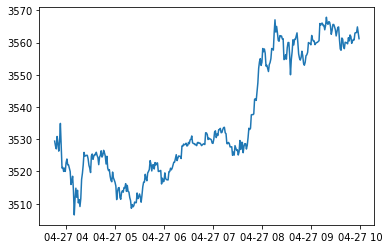

In [19]:
# chartData.json()['data'][0]['points'][0]['lp']
x = [dt.datetime.strptime(data['ts'],'%Y-%m-%dT%H:%M:%S.%fZ') for data in chartData.json()['data'][0]['points']]
y = [data['lp'] for data in chartData.json()['data'][0]['points']]

plt.plot(x, y)
plt.show()

In [20]:
rawData = pd.DataFrame(chartData.json()['data'][0]['points'])
rawData['ts']= pd.to_datetime(rawData['ts'])
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ts      374 non-null    datetime64[ns, UTC]
 1   lp      374 non-null    float64            
 2   v       374 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 8.9 KB


In [21]:
fig = px.line(rawData, x='ts', y="lp")
fig.show()

In [22]:
# TO BE CONTINUED (in other notebook) . . .

In [23]:
# marketcap, sector and risk
htmlBlock = soup.find("div", class_="stock-labels")
titles = htmlBlock.find_all("span", class_="stock-label-title")
descs = htmlBlock.find_all("span", class_="stock-label-desc")
for title in titles:
    print(title)
for desc in descs:
    print(desc)

value = titles[0].text if titles[0] is not None else None
print(value)
value = descs[0].text if descs[0] is not None else None
print(value)

value = titles[1].text if titles[1] is not None else None
print(value)
value = descs[1].text if descs[1] is not None else None
print(value)

value = titles[2].text if titles[2] is not None else None
print(value)
value = descs[2].text if descs[2] is not None else None
print(value)


<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Information Technology</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Largecap</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Low Risk</span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only">IT Services &amp; Consulting</span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only">With a market cap of ₹13,11,794 cr, stock is ranked 2</span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only">Stock is 1.30x as volatile as Nifty</span>
Information Technology
IT Services & Consulting
Largecap
With a market cap of ₹13,11,794 cr, stock is ranked 2
Low Risk
Stock is 1.30x as volatile as Nifty


### [3] Investment Checklist

In [24]:
# checklist-item carousel-item
htmlBlock = soup.find("div", class_="carousel-item")
# print(htmlBlock.prettify())

In [25]:
htmlBlock = soup.find("div", class_="carousel-item")

# get all keys and values
for item in htmlBlock.childGenerator():
    key = item.find("span", class_="tooltip-holder").contents[0]
    key = key.title().replace(" ", "")
    key = key[0].lower() + key[1:]
    value = item.find("i")['class'][3].split("-")[1]

    print(key, "     \t:", value)

intrinsicValue      	: negative
roeVsFdRates      	: positive
dividendReturns      	: positive
entryPoint      	: positive
noRedFlags      	: positive


### [4] Key Metrics

In [26]:
# ratios-card - PERatio, PBRatio, DividendYield, SectorPE, SectorPB, SectorDividendYield

htmlBlock = soup.find("div", class_="ratios-card")
# print(htmlBlock.prettify())

keys = htmlBlock.select("span.ellipsis.desktop--only")
values = htmlBlock.find_all("div", class_="value")

for i in range(len(keys)):
    key = keys[i].text
    key = key.replace(" ", "")
    value = values[i].text
    value = None if str(value) == "—" else str(value)
    print(key, "\t: ", value)


PERatio 	:  34.23
PBRatio 	:  14.60
DividendYield 	:  1.20%
SectorPE 	:  31.48
SectorPB 	:  8.56
SectorDivYld 	:  1.58%


### [5] Forecast & Ratings

In [27]:
# Forecast
htmlBlock = soup.find("div", class_="forecast-radial")
# print(htmlBlock.prettify())

In [28]:
# get forcast percentage

value = htmlBlock.div.span.contents[0] if str(htmlBlock.div.span.contents[0]) != "—" else ""
print(value)

symbol = htmlBlock.div.span.span.text if htmlBlock.div.span.span is not None else ""
print(symbol)

print(value + symbol if (value + symbol) != "" else None)

49
%
49%


In [29]:
"" + ""

''

In [30]:
# get forcast text
value = htmlBlock.h4.text if htmlBlock.h4 is not None else None
print(value)

Analysts have suggested that investors can buy this stock


# Let us try and extract data (from all the pages)

Import scraped data containing all stock/etf names and subdirectory, <br>
and Hit "https://www.tickertape.in/stocks/{stock-name}"

In [31]:
with open('top-company-list.json', 'r') as fp:
    topcompanies = json.load(fp)

topcompanies[0]

{'name': 'Adani Enterprises Ltd',
 'subdirectory': 'adani-enterprises-ADEL',
 'type': 'stocks'}

In [32]:
with open('full-company-list.json', 'r') as fp:
    allcompanies = json.load(fp)

allcompanies[0]

{'name': 'A & M Febcon Ltd',
 'subdirectory': 'a-and-m-febcon-AMF',
 'type': 'stocks'}

In [33]:
def scrapeTickertape(name, stocktype, subdirectory):
    _url = "https://www.tickertape.in/" + stocktype + "/" + subdirectory
    _data = {}

    try:
        # hit the page and get html
        _header = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"
        }
        _response = requests.get(_url, headers=_header)

        # give the webpage to Beautiful Soup using parsers: "html.parser" or "lxml"
        _soup = BeautifulSoup(_response.text, 'lxml')

        ######### extract html data from webpage and form output data #########

        ##### [1] Basics #####
        # company name
        _htmlBlock = _soup.find("h3", class_="security-name")
        _data["name"] = _htmlBlock.text if _htmlBlock is not None else None

        # ticker name
        _htmlBlock = _soup.find("span", class_="ticker")
        _data["ticker"] = _htmlBlock.text if _htmlBlock is not None else None

        # url
        _data["url"] = _url

        # type
        _data["type"] = stocktype

        # current price
        _htmlBlock = _soup.find("span", class_="current-price")
        _data["price"] = _htmlBlock.text if _htmlBlock is not None else None

        # marketcap, sector and risk
        _htmlBlock = _soup.find("div", class_="stock-labels")
        _htmlBlock = _htmlBlock.find_all("span", class_="stock-label-title")
        _data["sector"] = _htmlBlock[0].text if _htmlBlock[0] is not None else None
        _data["marketcap"] = _htmlBlock[1].text if _htmlBlock[1] is not None else None
        _data["risk"] = _htmlBlock[2].text if _htmlBlock[2] is not None else None

        # profile
        _htmlBlock = _soup.find("div", class_="peers-card")
        _value_h = _htmlBlock.h2.text if _htmlBlock.h2 is not None else ""
        _value_p = _htmlBlock.p.text if _htmlBlock.p is not None else ""
        _data["profile"] = _value_h + ": " + _value_p if (_value_h + _value_p) != "" else None

        ##### [2] Overview #####
        _overview = {}

        # current price
        _htmlBlock = _soup.find("span", class_="current-price")
        _overview["currentPrice"] = _htmlBlock.text if _htmlBlock is not None else None

        # change absolute-value
        _htmlBlock = _soup.find("span", class_="absolute-value")
        _overview["absoluteChange"] = _htmlBlock.text if _htmlBlock is not None else None

        # change percentage-value
        _htmlBlock = _soup.find("span", class_="percentage-value")
        _overview["percentageChange"] = str(_htmlBlock.text).replace("(", "").replace(")", "").strip() if _htmlBlock is not None else None

        # marketcap, sector and risk
        _htmlBlock = _soup.find("div", class_="stock-labels")
        _title = _htmlBlock.find_all("span", class_="stock-label-title")
        _desc = _htmlBlock.find_all("span", class_="stock-label-desc")

        _overview["sectorType"] = _title[0].text if _title[0] is not None else None
        _overview["sectorDesc"] = _desc[0].text if _desc[0] is not None else None

        _overview["capType"] = _title[1].text if _title[1] is not None else None
        _overview["capDesc"] = _desc[1].text if _desc[1] is not None else None

        _overview["riskType"] = _title[2].text if _title[2] is not None else None
        _overview["riskDesc"] = _desc[2].text if _desc[2] is not None else None

        # put overview into data
        _data["overview"] = _overview

        ##### [3] Investment Checklist #####
        _investmentChecklist = {}

        # checklist carousel-item get all keys and values
        _htmlBlock = _soup.find("div", class_="carousel-item")
        for _item in _htmlBlock.childGenerator():
            _key = _item.find("span", class_="tooltip-holder").contents[0]
            _key = _key.title().replace(" ", "")
            _key = _key[0].lower() + _key[1:]
            _value = _item.find("i")['class'][3].split("-")[1]
            _investmentChecklist[_key] = _value

        # put investmentChecklist into data
        _data["investmentChecklist"] = _investmentChecklist

        ##### [4] Key Metrics #####
        _keyMetrics = {}

        # PERatio, PBRatio, DividendYield, SectorPE, SectorPB, SectorDividendYield
        _htmlBlock = _soup.find("div", class_="ratios-card")
        _keys = _htmlBlock.select("span.ellipsis.desktop--only")
        _values = _htmlBlock.find_all("div", class_="value")
        for i in range(len(_keys)):
            _key = _keys[i].text
            _key = _key.replace(" ", "")
            _value = _values[i].text
            _value = None if str(_value) == "—" else str(_value)
            _keyMetrics[_key] = _value

        # put keyMetrics into data
        _data["keyMetrics"] = _keyMetrics

        ##### [5] Forecast & Ratings #####
        _forecasts = {}

        # Forecast
        _htmlBlock = _soup.find("div", class_="forecast-radial")
        _value = _htmlBlock.div.span.contents[0] if str(_htmlBlock.div.span.contents[0]) != "—" else ""
        _symbol = _htmlBlock.div.span.span.text if _htmlBlock.div.span.span is not None else ""
        _forecasts["buyRecommendation"] = _value + _symbol if (_value + _symbol) != "" else None
        _forecasts["forecast"] = _htmlBlock.h4.text if _htmlBlock.h4 is not None else None

        # put keyMetrics into data
        _data["forecasts"] = _forecasts

        # return the scraped data
        return _data
    except Exception as _e:
        print(_e)
        return []


In [34]:
scrapeTickertape(topcompanies[0]["name"], topcompanies[0]["type"], topcompanies[0]["subdirectory"])

{'forecasts': {'buyRecommendation': '0%',
  'forecast': 'Analysts have suggested that investors can buy this stock'},
 'investmentChecklist': {'dividendReturns': 'negative',
  'entryPoint': 'negative',
  'intrinsicValue': 'negative',
  'noRedFlags': 'positive',
  'roeVsFdRates': 'negative'},
 'keyMetrics': {'DividendYield': '0.04%',
  'PBRatio': '13.93',
  'PERatio': '285.53',
  'SectorDivYld': '0.65%',
  'SectorPB': '5.28',
  'SectorPE': '65.49'},
 'marketcap': 'Largecap',
 'name': 'Adani Enterprises Ltd',
 'overview': {'absoluteChange': '2.56%',
  'capDesc': 'With a market cap of ₹2,63,437 cr, stock is ranked 19',
  'capType': 'Largecap',
  'currentPrice': '2,334.10',
  'percentageChange': '-61.20',
  'riskDesc': 'Stock is 2.69x as volatile as Nifty',
  'riskType': 'Moderate Risk',
  'sectorDesc': 'Commodities Trading',
  'sectorType': 'Industrials'},
 'price': '2,334.10',
 'profile': 'Company Profile: Adani Enterprises Limited is an infrastructure company with businesses spanning co

In [35]:
# # let's scrape all the stocks & etfs!
# topStocksData = []
# count = 0

# for companies in topcompanies:
#     companyName = companies["name"]
#     companyType = companies["type"]
#     companyDir = companies["subdirectory"]
#     print(companyName, "url: https://www.tickertape.in/" + companyType + "/" + companyDir)
#     try:
#         # get data from each page and append to data list
#         if companyType == "stocks":
#             topStocksData.append(scrapeTickertape(companyName, companyType, companyDir))
#             print("successful!")
#             count += 1
#     except Exception as _e:
#         # some issue occured, catch exception
#         print("failed!")
#         print(_e)

# print(count, "/", len(topcompanies), "completed")

In [36]:
# # let's scrape all the stocks & etfs!
# allStocksData = []
# count = 0

# for companies in allcompanies:
#     companyName = companies["name"]
#     companyType = companies["type"]
#     companyDir = companies["subdirectory"]
#     print(companyName, "url: https://www.tickertape.in/" + companyType + "/" + companyDir)
#     try:
#         # get data from each page and append to data list
#         if companyType == "stocks":
#             allStocksData.append(scrapeTickertape(companyName, companyType, companyDir))
#             print("successful!")
#             count += 1
#     except Exception as _e:
#         # some issue occured, catch exception
#         print("failed!")
#         print(_e)

# print(count, "/", len(topcompanies), "completed")

## Exporting the data

In [37]:
# with open("top-company-tickertape-data.json", "w") as outfile:
#     json.dump(topStocksData, outfile)

In [38]:
# with open("all-company-tickertape-data.json", "w") as outfile:
#     json.dump(allStocksData, outfile)